This sheet will load, smooth, and add contours to an image of M87. 

In [1]:
import astropy

In [2]:
from astropy.wcs import WCS
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename

Going to get the WCS from astronomy.net, because using AIJ gets outdated WCS.

(actually, the stacks have all been aligned to each other, so we shouldn't have to do this part.)

In [3]:
#import photutils

In [4]:
#from astroquery.astrometry_net import AstrometryNet

In [5]:
#ast = AstrometryNet()
#ast.key = 'goiagdyjiupsvvzh'
#wcs_header = ast.solve_from_image('/home/cduston/Dropbox/Research/Astronomy/iTelescope/20200530/calibrated-T18-noorshams-M87-20200530-005812-Luminance-BIN1-W-010-001.fit')
#wcs_header = ast.solve_from_image('/home/cduston/Dropbox/Research/Astronomy/iTelescope/20200530/calibrated-T18-noorshams-M87-20200530-005812-Luminance-BIN1-W-010-001.fit', force_image_upload=True)

In [6]:
#print(wcs_header)

In [4]:
filenameB = get_pkg_data_filename('/home/cduston/Dropbox/Research/Astronomy/iTelescope/20200710/cal/aligned/SUM_stacked/SUM_aligned_B.fits')
filenameV = get_pkg_data_filename('/home/cduston/Dropbox/Research/Astronomy/iTelescope/20200710/cal/aligned/SUM_stacked/SUM_aligned_V.fits')
filenameI = get_pkg_data_filename('/home/cduston/Dropbox/Research/Astronomy/iTelescope/20200710/cal/aligned/SUM_stacked/SUM_aligned_I.fits')


In [5]:
hduB = fits.open(filenameB)
hduB.info()
hduV = fits.open(filenameV)
hduV.info()
hduI = fits.open(filenameI)
hduI.info()

Filename: /home/cduston/Dropbox/Research/Astronomy/iTelescope/20200710/cal/aligned/SUM_stacked/SUM_aligned_B.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       5   (2184, 1472)   float32   
Filename: /home/cduston/Dropbox/Research/Astronomy/iTelescope/20200710/cal/aligned/SUM_stacked/SUM_aligned_V.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       5   (2184, 1472)   float32   
Filename: /home/cduston/Dropbox/Research/Astronomy/iTelescope/20200710/cal/aligned/SUM_stacked/SUM_aligned_I.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       5   (2184, 1472)   float32   


So the data is located in the 0th block.

In [6]:
hdu_imageB=hduB[0].data
hdu_imageV=hduV[0].data
hdu_imageI=hduI[0].data
print(type(hdu_imageB))
print(hdu_imageB.shape)

<class 'numpy.ndarray'>
(1472, 2184)


This next set of code is just to get the scales of the image, so we know what min and max pixel values to use to in the display. This will have to be different for each of the filters.

In [8]:
import numpy as np
print('Min:', np.min(hdu_imageB))
print('Max:', np.max(hdu_imageB))
print('Mean:', np.mean(hdu_imageB))
print('Stdev:', np.std(hdu_imageB))

Min: 0.0
Max: 101943.47
Mean: 291.83365
Stdev: 255.33955


In [9]:
pix_maxB=np.mean(hdu_imageB)+np.std(hdu_imageB)
pix_minB=np.mean(hdu_imageB)-np.std(hdu_imageB)
pix_maxV=np.mean(hdu_imageV)+np.std(hdu_imageV)
pix_minV=np.mean(hdu_imageV)-np.std(hdu_imageV)
pix_maxI=np.mean(hdu_imageI)+np.std(hdu_imageI)
pix_minI=np.mean(hdu_imageI)-np.std(hdu_imageI)

Just checking that the images plot - frequently the guesses above are bad!

(note: since we have stacked these as a sum, there will be hot pixels and trailing - don't worry about that, as long as M87 is not saturated and majors stars around it are points)

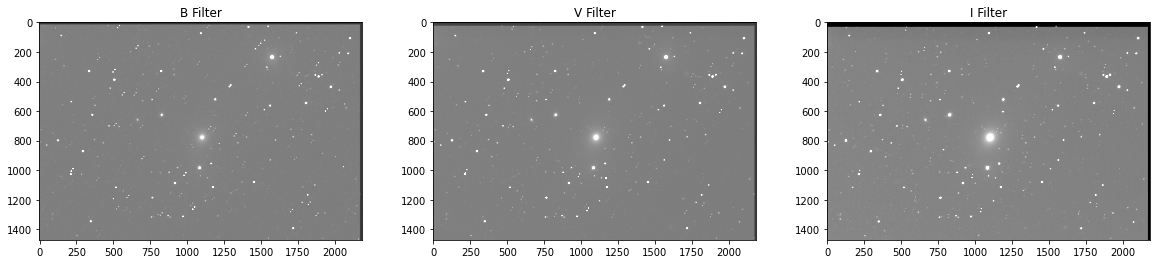

In [11]:
import matplotlib.pyplot as plt
fig, (B,V,I)=plt.subplots(1,3,figsize=(20,4))
#B = fig.add_subplot(1,3,1)
B.set_title('B Filter')
B.imshow(hdu_imageB,cmap='gray',vmin=pix_minB,vmax=pix_maxB)
V.set_title('V Filter')
V.imshow(hdu_imageV,cmap='gray',vmin=pix_minV,vmax=pix_maxV)
I.set_title('I Filter')
I.imshow(hdu_imageI,cmap='gray',vmin=pix_minI,vmax=pix_maxI)
#fig, ax = plt.subplots(1,3,figsize=(20,4))
#plt.imshow((hdu_imageB,hdu_imageV),cmap='gray',vmin=[pix_minB,pix_minV],vmax=[pix_maxB,pix_maxV])
#plt.imshow(hdu_imageV,cmap='gray',vmin=pix_minV,vmax=pix_maxV)
#plt.colorbar()
#plt.show()

We can also get a plot of the system coordinates right on the image - made this inactive since we don't really need it here.

In [12]:
#wcs1 = WCS(hdu[0].header)
#wcs=WCS(wcs_header)
#wcs=WCS(hdu[0].header)

In [13]:
#print(wcs)

In [14]:
#import matplotlib.pyplot as plt
#%matplotlib inline

In [15]:
#plt.subplot(projection=wcs)
#plt.imshow(hdu_image, cmap='gray',vmin=pix_min,vmax=pix_max)
#plt.grid(color='white', ls='solid')
#plt.xlabel('Dec')
#plt.ylabel('RA')
#plt.show()


See if we can get contours onto this...

In [16]:
#plt.contour(hdu_image, levels=np.logspace(-4.7, -3., 10), colors='white', alpha=0.5)
#plt.imshow(hdu_image, cmap='gray',vmin=50,vmax=250)
#plt.contour(hdu_image, levels=np.logspace(-4.7, -3., 10), colors='blue',alpha=0.5,vmin=50,vmax=250)
#plt.show()

Crop this image. Notice the size of the image can be found in the WCS above. This is assuming the source is centered, which is certainly not guaranteed, so will have to customized a bit for each run (change the pix_offset_x and pix_offset_y to customized this). Notice that there might be hot pixels around, and we really need for them to not be included in the cropping, or it will screw up the contour calculation.

B Filter first....

In [23]:
from astropy.nddata import Cutout2D
from astropy import units as u
pix_offset_x=15
pix_offset_y=40
positionB=(hdu_imageB.shape[1]/2+pix_offset_x,hdu_imageB.shape[0]/2+pix_offset_y)
sizeB=(50,50)
cutoutB=Cutout2D(hdu_imageB, positionB, sizeB)
print('Min:', np.min(cutoutB.data))
print('Max:', np.max(cutoutB.data))
print('Mean:', np.mean(cutoutB.data))
print('Stdev:', np.std(cutoutB.data))

Min: 207.07246
Max: 1223.5549
Mean: 442.3077
Stdev: 138.78781


We should reset the min and the max pixel values for display:

In [24]:
pix_maxB=np.mean(cutoutB.data)+2*np.std(cutoutB.data)
pix_minB=np.mean(cutoutB.data)-np.std(cutoutB.data)

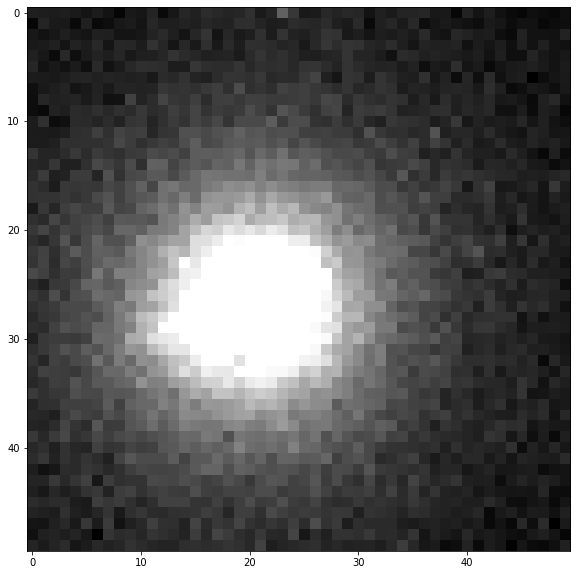

In [25]:
plt.figure(figsize=(10,10))
plt.imshow(cutoutB.data, cmap='gray',vmin=pix_minB,vmax=pix_maxB)
#plt.contour(cutout.data, levels=[250, 275,300],alpha=0.5,vmin=100,vmax=300,cmap='gist_rainbow')
plt.show()

V Filter....

(notice the offset values are being reset here!)

In [26]:
pix_offset_x=15
pix_offset_y=40
positionV=(hdu_imageV.shape[1]/2+pix_offset_x,hdu_imageV.shape[0]/2+pix_offset_y)
sizeV=(50,50)
cutoutV=Cutout2D(hdu_imageV, positionV, sizeV)
print('Min:', np.min(cutoutV.data))
print('Max:', np.max(cutoutV.data))
print('Mean:', np.mean(cutoutV.data))
print('Stdev:', np.std(cutoutV.data))

Min: 537.8517
Max: 3529.648
Mean: 941.5826
Stdev: 455.37445


In [27]:
pix_maxV=np.mean(cutoutV.data)+2*np.std(cutoutV.data)
pix_minV=np.mean(cutoutV.data)-np.std(cutoutV.data)

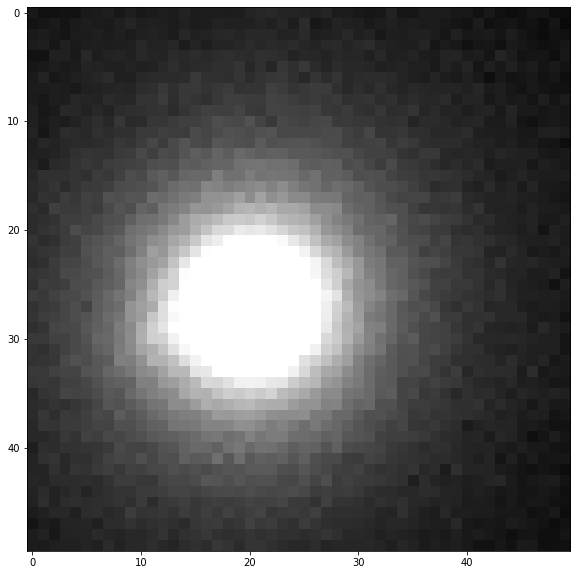

In [28]:
plt.figure(figsize=(10,10))
plt.imshow(cutoutV.data, cmap='gray',vmin=pix_minV,vmax=pix_maxV)
#plt.contour(cutout.data, levels=[250, 275,300],alpha=0.5,vmin=100,vmax=300,cmap='gist_rainbow')
plt.show()

I Filter....

In [29]:
pix_offset_x=15
pix_offset_y=40
positionI=(hdu_imageI.shape[1]/2+pix_offset_x,hdu_imageV.shape[0]/2+pix_offset_y)
sizeI=(50,50)
cutoutI=Cutout2D(hdu_imageI, positionI, sizeI)
print('Min:', np.min(cutoutI.data))
print('Max:', np.max(cutoutI.data))
print('Mean:', np.mean(cutoutI.data))
print('Stdev:', np.std(cutoutI.data))

Min: 1343.3955
Max: 6857.368
Mean: 2080.4976
Stdev: 863.95703


In [30]:
pix_maxI=np.mean(cutoutI.data)+2*np.std(cutoutI.data)
pix_minI=np.mean(cutoutI.data)-np.std(cutoutI.data)

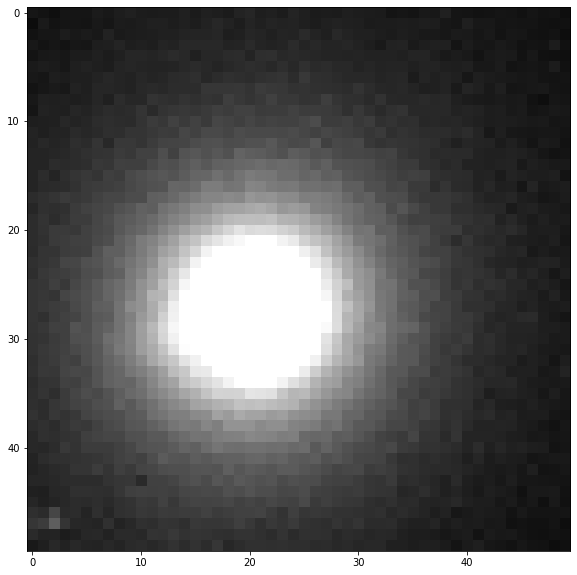

In [31]:
plt.figure(figsize=(10,10))
plt.imshow(cutoutI.data, cmap='gray',vmin=pix_minI,vmax=pix_maxI)
#plt.contour(cutout.data, levels=[250, 275,300],alpha=0.5,vmin=100,vmax=300,cmap='gist_rainbow')
plt.show()

Now add contours...

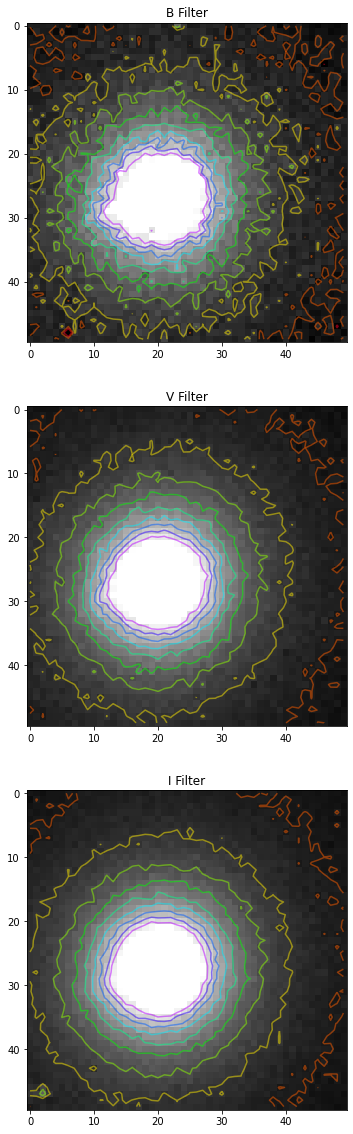

In [32]:
fig, (contB,contV,contI)=plt.subplots(3,1,figsize=(20,20))
#fig.figure(figsize=(20,20))
contB.set_title("B Filter")
contB.imshow(cutoutB.data, cmap='gray',vmin=pix_minB,vmax=pix_maxB)
contB.contour(cutoutB.data, levels=np.arange(pix_minB,pix_maxB,(pix_maxB-pix_minB)/10),alpha=0.5,vmin=pix_minB,vmax=pix_maxB,cmap='gist_rainbow')
contV.set_title("V Filter")
contV.imshow(cutoutV.data, cmap='gray',vmin=pix_minV,vmax=pix_maxV)
contV.contour(cutoutV.data, levels=np.arange(pix_minV,pix_maxV,(pix_maxV-pix_minV)/10),alpha=0.5,vmin=pix_minV,vmax=pix_maxV,cmap='gist_rainbow')
contI.set_title("I Filter")
contI.imshow(cutoutI.data, cmap='gray',vmin=pix_minI,vmax=pix_maxI)
contI.contour(cutoutI.data, levels=np.arange(pix_minI,pix_maxI,(pix_maxI-pix_minI)/10),alpha=0.5,vmin=pix_minI,vmax=pix_maxI,cmap='gist_rainbow')
#plt.show()

Probably want to smooth this to get the contours more clear. Let's normalize the images first, between 0 and 1:

In [33]:
from astropy.visualization import MinMaxInterval
interval = MinMaxInterval()
cutout_normB=interval(cutoutB.data)
cutout_normV=interval(cutoutV.data)
cutout_normI=interval(cutoutI.data)

Now pick the kernel to use - Gaussian. This is not the only option, and could be messed around with.

In [37]:
from astropy.convolution import Gaussian2DKernel
from astropy.convolution import convolve
kernel = Gaussian2DKernel(x_stddev=0.5)


In [38]:
#from astropy.convolution import Box2DKernel
#from astropy.convolution import convolve
#kernel = Box2DKernel(1)

In [39]:
astropy_convB = convolve(cutout_normB, kernel)
astropy_convV = convolve(cutout_normV, kernel)
astropy_convI = convolve(cutout_normI, kernel)

Careful with this next block, the last line overwrites any image at that location! And this save image line has to be in this block, for some reason.

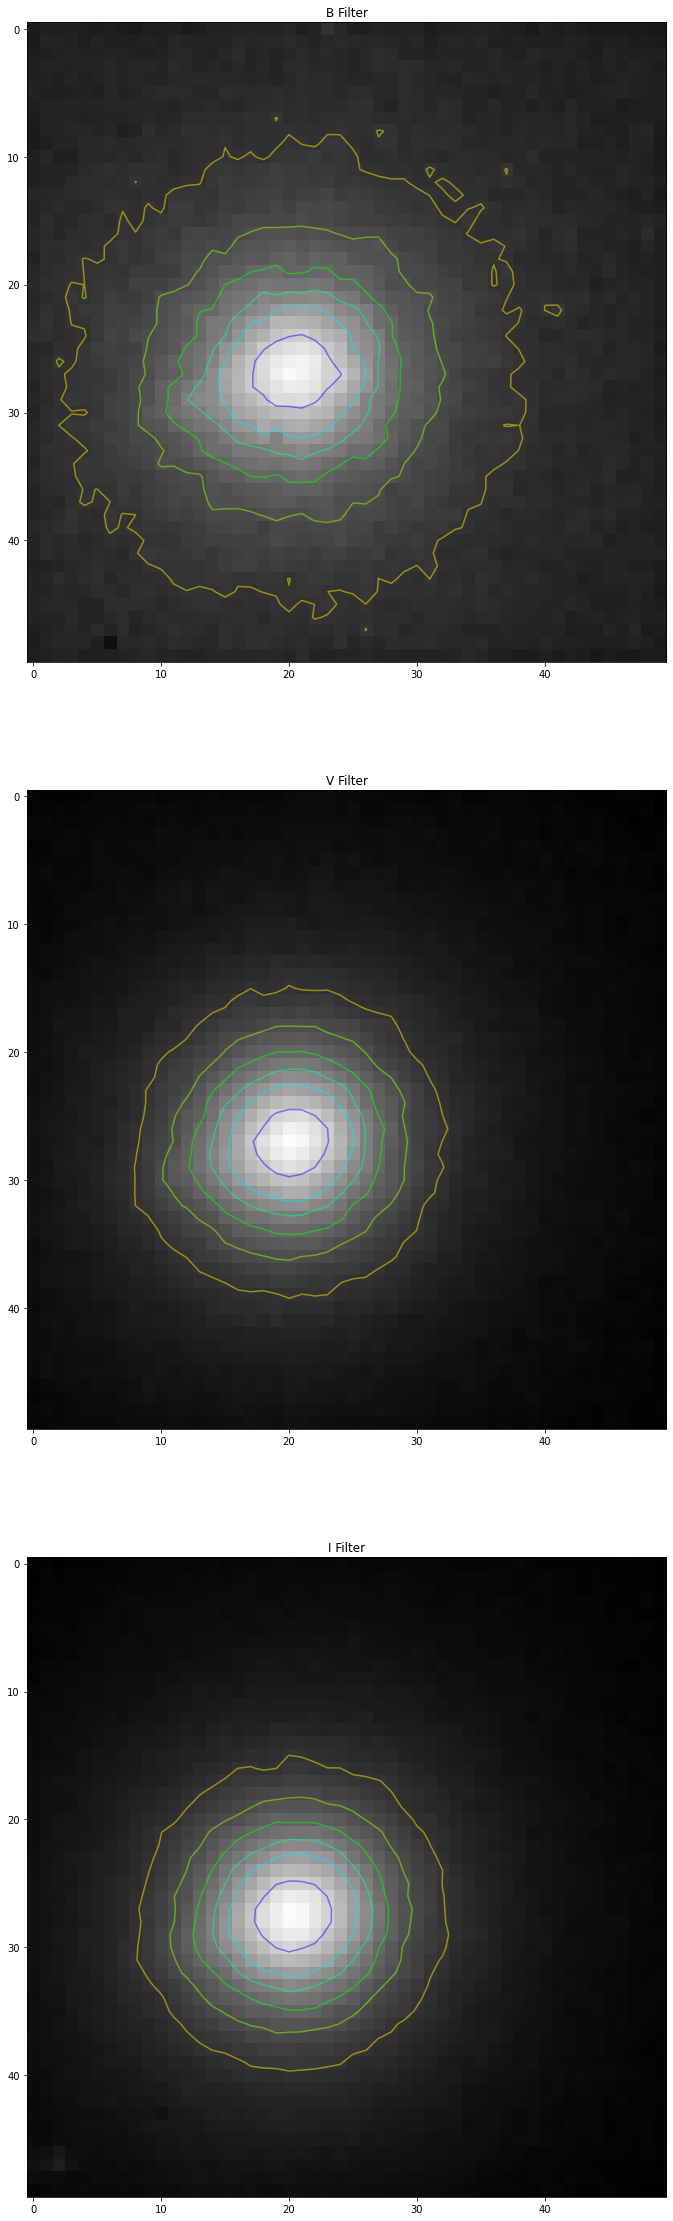

In [44]:
fig, (contB,contV,contI)=plt.subplots(3,1,figsize=(20,40))
#fig.figure(figsize=(20,20))
contB.set_title("B Filter")
contB.imshow(astropy_convB.data, cmap='gray',vmin=0,vmax=1)
contB.contour(astropy_convB.data, levels=[0.2,0.3,0.4,0.5,0.6,0.8],alpha=0.5,vmin=0,vmax=1,cmap='gist_rainbow')
contV.set_title("V Filter")
contV.imshow(astropy_convV.data, cmap='gray',vmin=0,vmax=1)
contV.contour(astropy_convV.data, levels=[0.2,0.3,0.4,0.5,0.6,0.8],alpha=0.5,vmin=0,vmax=1,cmap='gist_rainbow')
contI.set_title("I Filter")
contI.imshow(astropy_convI.data, cmap='gray',vmin=0,vmax=1)
contI.contour(astropy_convI.data, levels=[0.2,0.3,0.4,0.5,0.6,0.8],alpha=0.5,vmin=0,vmax=1,cmap='gist_rainbow')
plt.savefig('M87-20200710-AstroPy-Contours.png')

compare with pre-smoothed image:

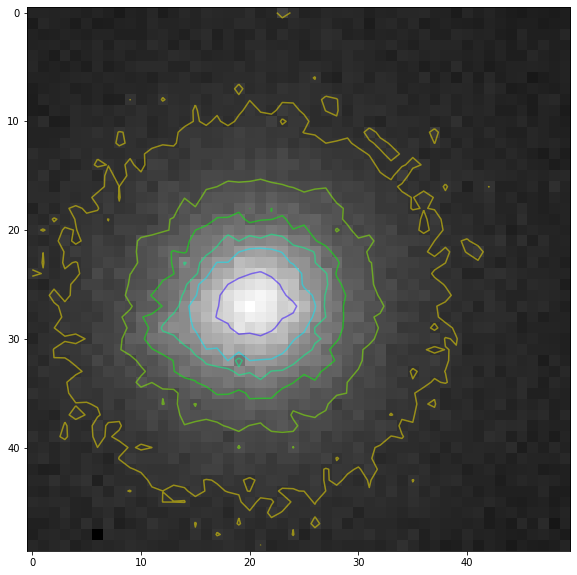

In [41]:
plt.figure(figsize=(10,10))
plt.imshow(cutout_normB, cmap='gray',vmin=0,vmax=1)
plt.contour(cutout_normB, levels=[0.2,0.3,0.4,0.5,0.6,0.8],alpha=0.5,vmin=0,vmax=1,cmap='gist_rainbow')
#plt.savefig('M87-V-AstroPy-Contours.png')

In this case, the smoothing seems to be an improvement, since it appears less noisy. Perhaps the smoothing is actually too much - should consider that possibility!

Next line just shows the difference between the smoothed and nonsmooth version...for looking at and reflecting...

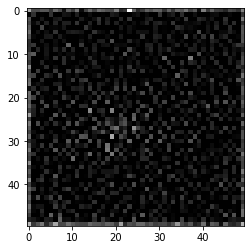

In [43]:
plt.imshow(cutout_normB-astropy_convB.data, cmap='gray',vmin=0,vmax=.05)